In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import os
import gc

In [3]:
info = os.listdir('./data')
len(info)
df1 = {}
for i in range(len(info)):
    df1[info[i][0:-4]] = pd.read_csv('./data/'+info[i], index_col=0, sep = ",", engine='python').sample(n=5000).reset_index(drop=True)


In [4]:
df1['tree']

,drawing,word
0,"[[[193, 194, 180, 174, 166, 160], [217, 213, 1...",tree
1,"[[[44, 50, 51], [114, 175, 255]], [[74, 79, 85...",tree
2,"[[[28, 49, 57, 39, 7, 1, 0, 7, 20, 26, 22, 23,...",tree
3,"[[[78, 78, 76, 64], [116, 220, 234, 255]], [[1...",tree
4,"[[[77, 77, 58, 174, 173, 138, 121, 119, 122, 7...",tree
...,...,...
4995,"[[[63, 60, 63], [152, 167, 255]], [[62, 27, 12...",tree
4996,"[[[36, 51, 66, 60, 43, 25, 12, 9, 0, 1, 23, 46...",tree
4997,"[[[93, 49, 20, 17, 20, 37, 18, 6, 0, 5, 31, 41...",tree
4998,"[[[69, 34], [119, 194]], [[71, 41], [113, 109]...",tree


In [5]:
from ast import literal_eval
for item in df1:
    df1[item].drawing = df1[item].drawing.apply(literal_eval)
    df1[item] = df1[item].drawing.tolist()

In [6]:
from PIL import Image, ImageDraw
data = []
labels = []
label_item = {}
label = 0
for item in df1:
    label_item[item] = label
    for img in df1[item]:
        out = Image.new("1", (256, 256), 1)
        draw = ImageDraw.Draw(out)
        for stroke in img:
            for i in range(len(stroke[0])-1):
                draw.line((stroke[0][i], stroke[1][i], stroke[0][i+1], stroke[1][i+1]), fill=0,width = 10)
        data.append(np.array(out.resize((64,64))))
        labels.append(label)
    label += 1

In [7]:
data = np.array(data)
data[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.3,random_state=0)

# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [9]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [10]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train_cnn, validation_data=(X_test, y_test_cnn), epochs=1, batch_size=200)

Train on 105000 samples, validate on 45000 samples
Epoch 1/1
105000/105000 [==============================] - 10s 98us/step - loss: 0.1041 - accuracy: 0.9652 - val_loss: 0.2836 - val_accuracy: 0.9283


In [17]:
model.save('classifier_model.h5')

In [21]:
import cv2
img = cv2.imread('./images/hand1.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,1)
img = np.where(img == 255,1,0)
print(np.argmax(model.predict(img), axis=1)) 

[0]


In [91]:
label_item

{'tree': 0,
 'star': 1,
 'hamburger': 2,
 'diamond': 3,
 'bee': 4,
 'The_Eiffel_Tower': 5,
 'sword': 6,
 'cake': 7,
 'bicycle': 8,
 'ladder': 9,
 'door': 10,
 'guitar': 11,
 'scissors': 12,
 'chair': 13,
 'bird': 14,
 'pencil': 15,
 'airplane': 16,
 'shoe': 17,
 'hand': 18,
 'hat': 19,
 'hammer': 20,
 'rabbit': 21,
 'leaf': 22,
 'lion': 23,
 'computer': 24,
 'butterfly': 25,
 'camera': 26,
 'cat': 27,
 'clock': 28,
 'ear': 29}

In [31]:
from tensorflow import keras
model = keras.models.load_model('models/GAN_The_Eiffel_Tower.h5')

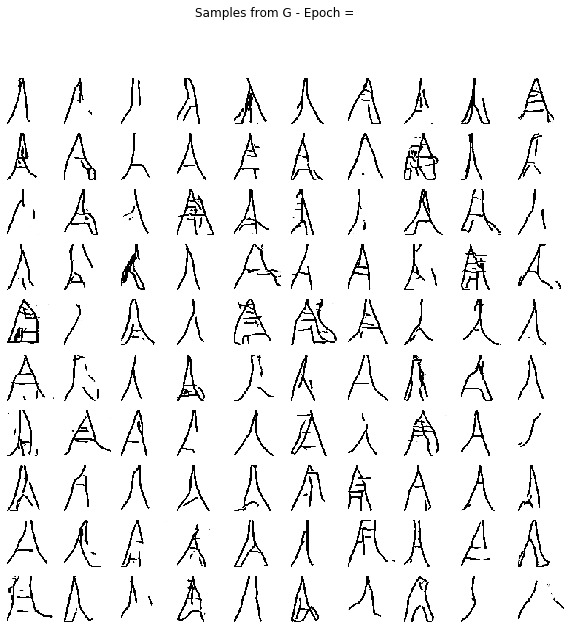

In [32]:
num_examples = 100
random_noise = np.random.normal(0, 1, size=[num_examples, 100])
generated_images = model.predict(random_noise)
generated_images = (generated_images.reshape(num_examples, 64, 64) + 1) *0.5

plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
    plt.axis('off')

plt.suptitle("Samples from G - Epoch = ")
plt.show()

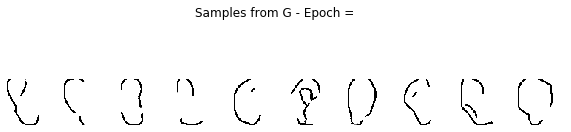

In [28]:
num_examples = 10
random_noise = np.random.normal(0, 1, size=[num_examples, 100])
generated_images = model.predict(random_noise)
generated_images = (generated_images.reshape(num_examples, 64, 64) + 1) *0.5

plt.figure(figsize=(10, 10))
for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
    plt.axis('off')

plt.suptitle("Samples from G - Epoch = ")
plt.show()

In [34]:
from tensorflow import keras
model2 = keras.models.load_model('classifier_model.h5')
generated_images = generated_images.reshape(100,64,64,1)
print(np.argmax(model2.predict(generated_images), axis=1)) 

[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 29  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 15  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5 29  5]
